In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Czyszczenie danych (ang. data cleaning)
Proces czyszczenia danych jest również częścią procesu EDA, ale skupiającym się tylko na analizie danych pod kątem ich poprawności strukturalnej. Jest to pierwszy etap, w którym naprawiane są ewentualne błędy np. w kodowaniu, nazwach, formacie danych. Rozpocznijmy od pliku ['data/olympics.csv'](olympics.csv)

In [3]:
df = pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,? Summer,01 !,02 !,03 !,Total,? Winter,01 !,02 !,03 !,Total,? Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


Jak widać dwa pierwsze wiersze wprowadzają pewien bałagan w sposobie etykietowania kolumn. Wczytując dane do DataFrame możemy wskazać wiersz nagłówkowy.

In [4]:
df = pd.read_csv('olympics.csv', header=1)
df.head()

,Unnamed: 0,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Mimo to nazwy kolumn nadal nie są jednoznaczne i posiadają znaki, które są tam raczej zbędne. Aby zrozumieć strukturę tych danych należy prześledzić stronę źródłową z danymi: [https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table](https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table). Pozostańmy przy nazwach angielskich.

In [5]:
# kolumny DataFrame
df.columns

Index(['Unnamed: 0', '? Summer', '01 !', '02 !', '03 !', 'Total', '? Winter',
       '01 !.1', '02 !.1', '03 !.1', 'Total.1', '? Games', '01 !.2', '02 !.2',
       '03 !.2', 'Combined total'],
      dtype='object')

In [6]:
# obiekt typu Index, który przechowuje nazwy kolumn nie jest mutowalny, więc poniższy kod nie zadziała
# df.columns[0] = 'Country'
# df.columns

In [7]:
# możemy natomiast wykorzystać metodę rename
df.rename(columns={'Unnamed: 0': 'Country'}, inplace=True)
df.head()

,Country,? Summer,01 !,02 !,03 !,Total,? Winter,01 !.1,02 !.1,03 !.1,Total.1,? Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [8]:
# jeżeli jednak ta zamiana ma dotyczyć niemal wszystkich kolumn to powyższa metoda jest dość pracochłonna
# możemy po prostu przekazać nowy wektor kolumn
# tworzymy kopię ramki na potrzeby kolejnych przykładów
df_copy = df.copy()
new_columns = ['Country','Summer games', 'Summer Gold', 'Summer Silver', 'Summer bronze', 'Summer Total', 'Winter games', 'Winter Gold', 'Winter silver', 'Winter Bronze', 'Winter total', 'Games total', 'Gold total', 'Silver total', 'Bronze total','Combined total']
df.columns = new_columns
df.head()

,Country,Summer games,Summer Gold,Summer Silver,Summer bronze,Summer Total,Winter games,Winter Gold,Winter silver,Winter Bronze,Winter total,Games total,Gold total,Silver total,Bronze total,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [9]:
# możemy też pobrać wszystkie dotychczasowe nazwy kolumn i dokonać przekształceń
old_columns = df_copy.columns.values
new_columns = [col.replace('? ', '').replace(' !','') for col in old_columns]

old_columns, new_columns

(array(['Country', '? Summer', '01 !', '02 !', '03 !', 'Total', '? Winter',
        '01 !.1', '02 !.1', '03 !.1', 'Total.1', '? Games', '01 !.2',
        '02 !.2', '03 !.2', 'Combined total'], dtype=object),
 ['Country',
  'Summer',
  '01',
  '02',
  '03',
  'Total',
  'Winter',
  '01.1',
  '02.1',
  '03.1',
  'Total.1',
  'Games',
  '01.2',
  '02.2',
  '03.2',
  'Combined total'])

In [10]:
# i ponownie przypisać do ramki danych
df_copy.columns = new_columns
df_copy.head()

,Country,Summer,01,02,03,Total,Winter,01.1,02.1,03.1,Total.1,Games,01.2,02.2,03.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [11]:
# Można jeszcze dokonać przekształcenia kolumny Country, pozostawiając tylko nazwę kraju a skrót przenieść do oddzielnej kolumny.
df.Country

0                                 Afghanistan (AFG)
1                                     Algeria (ALG)
2                                   Argentina (ARG)
3                                     Armenia (ARM)
4                           Australasia (ANZ) [ANZ]
                           ...                     
142    Independent Olympic Participants (IOP) [IOP]
143                              Zambia (ZAM) [ZAM]
144                            Zimbabwe (ZIM) [ZIM]
145                          Mixed team (ZZX) [ZZX]
146                                          Totals
Name: Country, Length: 147, dtype: object

In [12]:
# Kilka sytuacji, które musimy wziąć pod uwagę:
# 1. wiersze, w których skróty występują podwójnie - w nawiasie kwadratowym i zwykłym - na potrzeby zadania przyjmijmy, że potrzebne są tylko nazwy z nawiasów zwykłych
# 2. nazwy krajów bywają wieloczłonowe
# Ważne jest też to, że w ostatnim wierszu widnieje wiersz podsumowania, którego nie chcemy
# Przyjąłem następujące podejście:
# 1 - wyszukuję pierwsze wystąpienie znaku ( i tekst poprzedzający umieszczam w wektorze nazw krajów
# 2 - tekst pomiędzy '(' a ')' umieszcza w wektorze skrótów

country_and_shortcut = [(line[:line.find('(')], line[line.find('(')+1:line.find(')')]) for line in df.Country.values[:-1]]
country_and_shortcut[:10]

[('Afghanistan ', 'AFG'),
 ('Algeria ', 'ALG'),
 ('Argentina ', 'ARG'),
 ('Armenia ', 'ARM'),
 ('Australasia ', 'ANZ'),
 ('Australia ', 'AUS'),
 ('Austria ', 'AUT'),
 ('Azerbaijan ', 'AZE'),
 ('Bahamas ', 'BAH'),
 ('Bahrain ', 'BRN')]

In [13]:
df['Country'] = [item[0] for item in country_and_shortcut] + [df.Country.values[-1]]
df.head()

,Country,Summer games,Summer Gold,Summer Silver,Summer bronze,Summer Total,Winter games,Winter Gold,Winter silver,Winter Bronze,Winter total,Games total,Gold total,Silver total,Bronze total,Combined total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [14]:
# Pozostaje dodanie nowej kolumny ze skrótem
df['Shortcut'] = [item[1] for item in country_and_shortcut] + [df.Country.values[-1]]
df.head()

,Country,Summer games,Summer Gold,Summer Silver,Summer bronze,Summer Total,Winter games,Winter Gold,Winter silver,Winter Bronze,Winter total,Games total,Gold total,Silver total,Bronze total,Combined total,Shortcut
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


In [15]:
# Zmiana kolejności kolumn
df = df[['Country', 'Shortcut'] + df.columns.to_list()[1:-1]]
df.head()

,Country,Shortcut,Summer games,Summer Gold,Summer Silver,Summer bronze,Summer Total,Winter games,Winter Gold,Winter silver,Winter Bronze,Winter total,Games total,Gold total,Silver total,Bronze total,Combined total
0,Afghanistan,AFG,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,ALG,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,ARG,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,ARM,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,ANZ,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


## **Zadania część 1**

Rozwiązania zadań zapisz w postaci notatnika Jupyter.

**Zadanie 1**

Dodaj dwie nowe kolumny w ramce `Summer medals mean` oraz `Winter medals mean` i umieść w nich odpowiednio średnią ilość zdobytych medali na olimpiadę (odpowiednio letnią i zimową). Wyświetl na konsoli 10 najlepszych krajów, sortując najpierw po średniej dla letniej olimpiady, a później dla olimpiady zimowej.


**Zadanie 2**

Ze zbioru danych oczyszczonego powyżej wyświetl na wykresie słupkowym 10 krajów o najwyższej sumarycznej ilości zdobytych medali.


**Zadanie 3**

Wyświetl wykres podobny do tego z zadania 1, ale słupki powinny być skumulowane - dla gold, silver, bronze.

#### Zadanie 1

In [16]:
# Dodanie średniej zdobytych medali podczas letnich igrzysk
df['Summer medals mean'] = df.apply(lambda row: row['Summer Total'] / row['Summer games'] if row['Summer games'] != 0 else 0, axis=1)

In [17]:
# Dodanie średniej zdobytych medali podczas zimowych igrzysk
df['Winter medals mean'] = df.apply(lambda row: row['Winter total'] / row['Winter games'] if row['Winter games'] != 0 else 0, axis=1)

In [18]:
df[['Country', 'Summer medals mean', 'Winter medals mean']].sort_values(by='Summer medals mean', ascending=False).sort_values(by='Winter medals mean', ascending=False)[1:11]

,Country,Summer medals mean,Winter medals mean
107,Unified Team,112.000000,23.000000
106,Soviet Union,112.222222,21.555556
104,Russia,79.000000,20.666667
44,Germany,38.200000,19.000000
46,East Germany,81.800000,18.333333
93,Norway,6.166667,14.954545
135,United States,92.269231,12.818182
6,Austria,3.307692,9.909091
21,Canada,11.160000,7.727273
40,Finland,12.583333,7.318182


#### Zadanie 2

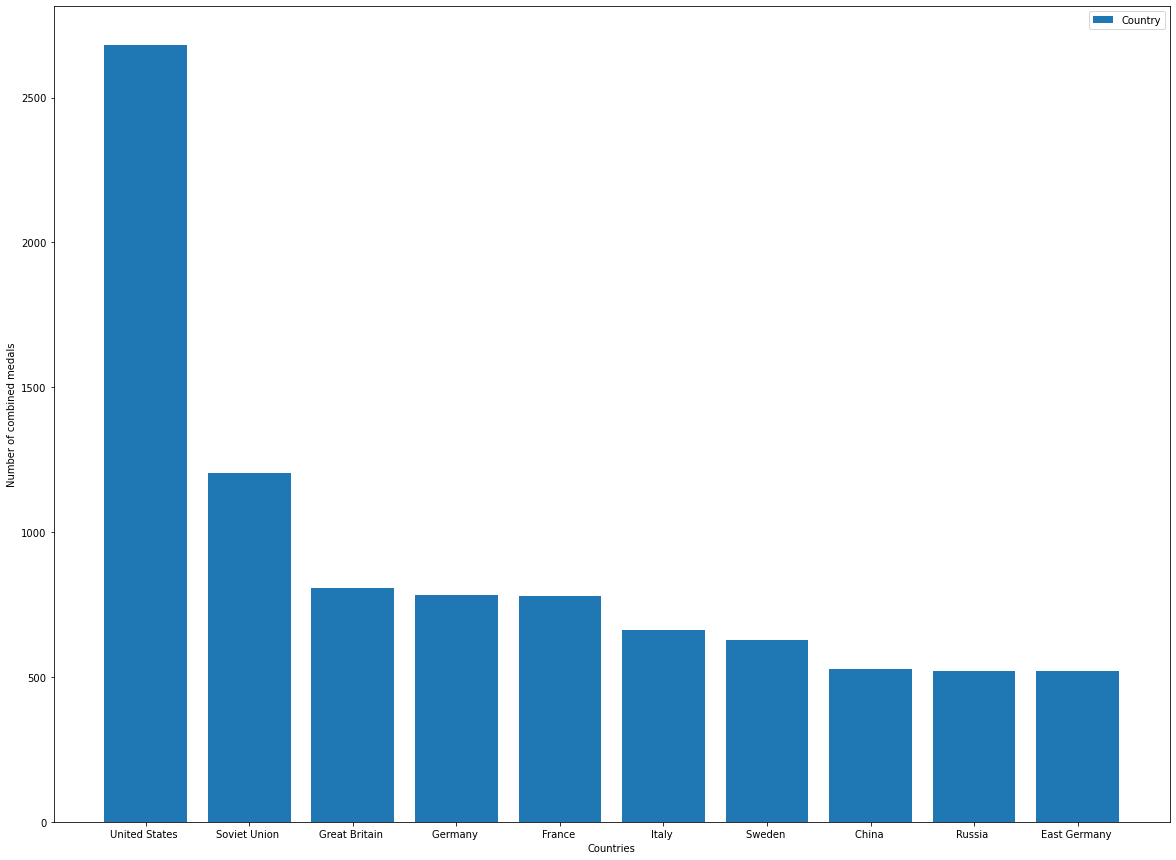

In [19]:
best_countries_summer = df[['Country', 'Combined total']].sort_values(by='Combined total', ascending=False)[1:11]

plt.figure(figsize=(20, 15))
plt.bar(best_countries_summer['Country'], best_countries_summer['Combined total'])
plt.xlabel("Countries")
plt.ylabel("Number of combined medals")
plt.legend(labels=best_countries_summer.keys())

#### Zadanie 3

In [47]:
df_grouped = df[['Country', 'Gold total', 'Silver total', 'Bronze total']].groupby('Country').sum()
df_grouped_sorted = df_grouped.sort_values("Gold total", ascending=False)[1:11]

<AxesSubplot:title={'center':'Gold, Silver and Bronze medals'}, xlabel='Country'>

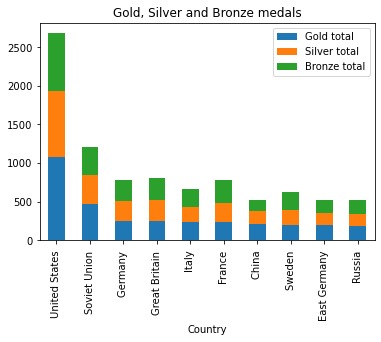

In [48]:
df_grouped_sorted.plot(kind='bar', stacked=True, title='Gold, Silver and Bronze medals')